In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os,glob
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
project_path = "/content/drive/MyDrive/AB_NYC_2019.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("AB_NYC_2019.csv")

In [ ]:

print("Shape:", df.shape)
display(df.head())
display(df.columns.tolist())
df.info()

Shape: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
list(df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head(20)
df.tail(30)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48865,36472171,1 bedroom in sunlit apartment,99144947,Brenda,Manhattan,Inwood,40.86845,-73.92449,Private room,80,1,0,NaN,NaN,1,79
48866,36472710,CozyHideAway Suite,274225617,Alberth,Queens,Briarwood,40.70786,-73.81448,Entire home/apt,58,1,0,NaN,NaN,1,159
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,NaN,NaN,6,338
48868,36473253,Heaven for you(only for guy),261338177,Diana,Brooklyn,Gravesend,40.59118,-73.97119,Shared room,25,7,0,NaN,NaN,6,365
48869,36474023,"Cozy, Sunny Brooklyn Escape",1550580,Julia,Brooklyn,Bedford-Stuyvesant,40.68759,-73.95705,Private room,45,4,0,NaN,NaN,1,7
48870,36474911,"Cozy, clean Williamsburg 1- bedroom apartment",1273444,Tanja,Brooklyn,Williamsburg,40.71197,-73.94946,Entire home/apt,99,4,0,NaN,NaN,1,22
48871,36475746,A LARGE ROOM - 1 MONTH MINIMUM - WASHER&DRYER,144008701,Ozzy Ciao,Manhattan,Harlem,40.82233,-73.94687,Private room,35,29,0,NaN,NaN,2,31
48872,36476675,Nycity-MyHome,8636072,Ben,Manhattan,Hell's Kitchen,40.76236,-73.99255,Entire home/apt,260,3,0,NaN,NaN,1,9
48873,36477307,Brooklyn paradise,241945355,Clement & Rose,Brooklyn,Flatlands,40.63116,-73.92616,Entire home/apt,170,1,0,NaN,NaN,2,363
48874,36477588,Short Term Rental in East Harlem,214535893,Jeffrey,Manhattan,East Harlem,40.79760,-73.93947,Private room,50,7,0,NaN,NaN,1,22


In [ ]:
df.isnull().sum()
data = df.drop(['id', 'name', 'host_name', 'last_review'], axis=1)
data.describe(include='all')

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
unique,NaN,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.762001e+07,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000


In [ ]:
data=data.loc[data['minimum_nights']>20]
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.330000e+03,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,3206.000000,5330.000000,5330.000000
mean,7.314492e+07,40.736916,-73.963756,186.890432,39.376923,8.334897,0.508160,38.080675,216.794184
std,8.050278e+07,0.045988,0.035562,407.333788,51.183600,22.938434,0.720889,71.114965,131.419001
min,2.438000e+03,40.546390,-74.176280,0.000000,21.000000,0.000000,0.010000,1.000000,0.000000
25%,8.570642e+06,40.706605,-73.986980,70.000000,30.000000,0.000000,0.120000,1.000000,90.000000
50%,3.028359e+07,40.741435,-73.967855,130.000000,30.000000,1.000000,0.260000,5.000000,253.500000
75%,1.207625e+08,40.763990,-73.946200,200.000000,30.000000,6.000000,0.560000,39.000000,335.000000
max,2.740145e+08,40.911690,-73.734320,10000.000000,1250.000000,467.000000,6.320000,327.000000,365.000000


In [ ]:
print("\nDescriptive Statistics:\n")
display(data.describe(include='all'))


Descriptive Statistics:



,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.330000e+03,5330,5330,5330.000000,5330.000000,5330,5330.000000,5330.000000,5330.000000,3206.000000,5330.000000,5330.000000
unique,NaN,5,130,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Manhattan,Midtown,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3318,389,NaN,NaN,3694,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.314492e+07,NaN,NaN,40.736916,-73.963756,NaN,186.890432,39.376923,8.334897,0.508160,38.080675,216.794184
std,8.050278e+07,NaN,NaN,0.045988,0.035562,NaN,407.333788,51.183600,22.938434,0.720889,71.114965,131.419001
min,2.438000e+03,NaN,NaN,40.546390,-74.176280,NaN,0.000000,21.000000,0.000000,0.010000,1.000000,0.000000
25%,8.570642e+06,NaN,NaN,40.706605,-73.986980,NaN,70.000000,30.000000,0.000000,0.120000,1.000000,90.000000
50%,3.028359e+07,NaN,NaN,40.741435,-73.967855,NaN,130.000000,30.000000,1.000000,0.260000,5.000000,253.500000
75%,1.207625e+08,NaN,NaN,40.763990,-73.946200,NaN,200.000000,30.000000,6.000000,0.560000,39.000000,335.000000


In [ ]:
if 'neighbourhood_group' in df.columns and 'price' in df.columns:
  group_mean = df.groupby('neighbourhood_group')['price'].mean()
  diff_table = group_mean - group_mean.mean()
  print("\nDifference Table (Avg price by neighbourhood_group - overall mean):\n")
  display(diff_table)


Difference Table (Avg price by neighbourhood_group - overall mean):



,price
neighbourhood_group,
Bronx,-37.120367
Brooklyn,-0.233952
Manhattan,72.258655
Queens,-25.099510
Staten Island,-9.804826


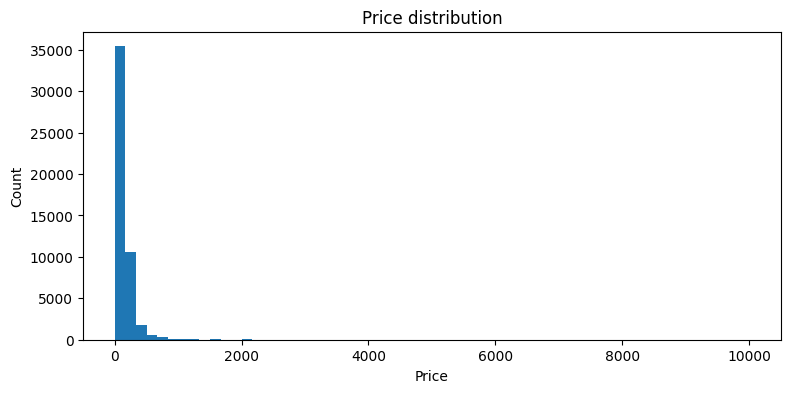

In [ ]:
if 'price' in df.columns:
    plt.figure(figsize=(9,4))
    plt.hist(df['price'].dropna(), bins=60)
    plt.title('Price distribution')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()

<Figure size 800x400 with 0 Axes>

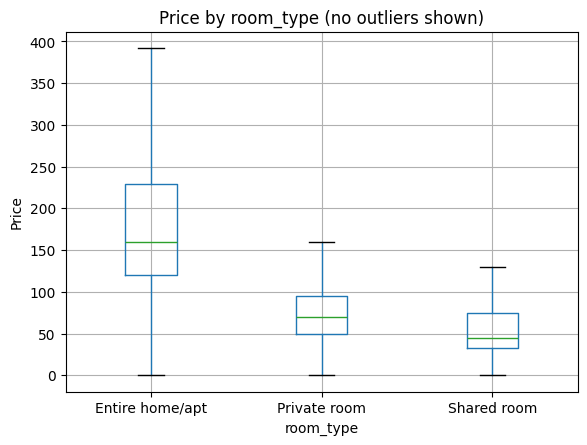

In [ ]:
if 'price' in df.columns and 'room_type' in df.columns:
    plt.figure(figsize=(8,4))
    df.boxplot(column='price', by='room_type', showfliers=False)
    plt.suptitle('')
    plt.title('Price by room_type (no outliers shown)')
    plt.ylabel('Price')
    plt.show()

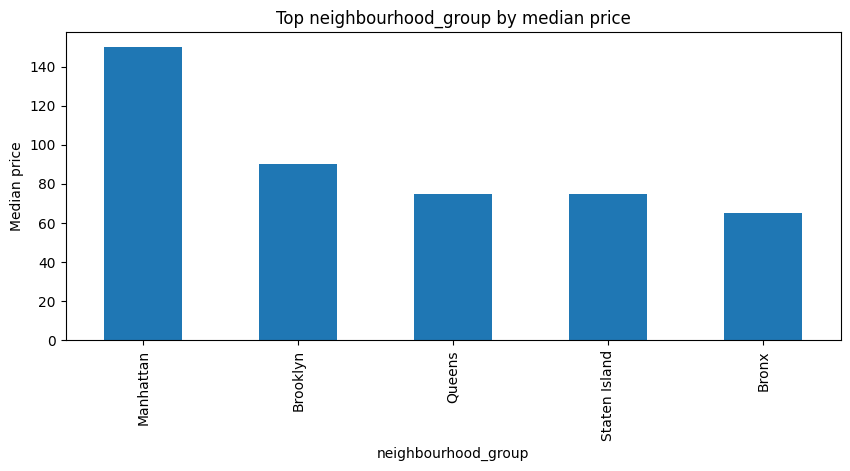

In [ ]:
group_col = None
if 'neighbourhood_group' in df.columns:
    group_col = 'neighbourhood_group'
elif 'neighbourhood' in df.columns:
    group_col = 'neighbourhood'

if group_col and 'price' in df.columns:
    med = df.groupby(group_col)['price'].median().sort_values(ascending=False).head(12)
    plt.figure(figsize=(10,4))
    med.plot(kind='bar')
    plt.title(f'Top {group_col} by median price')
    plt.ylabel('Median price')
    plt.show()

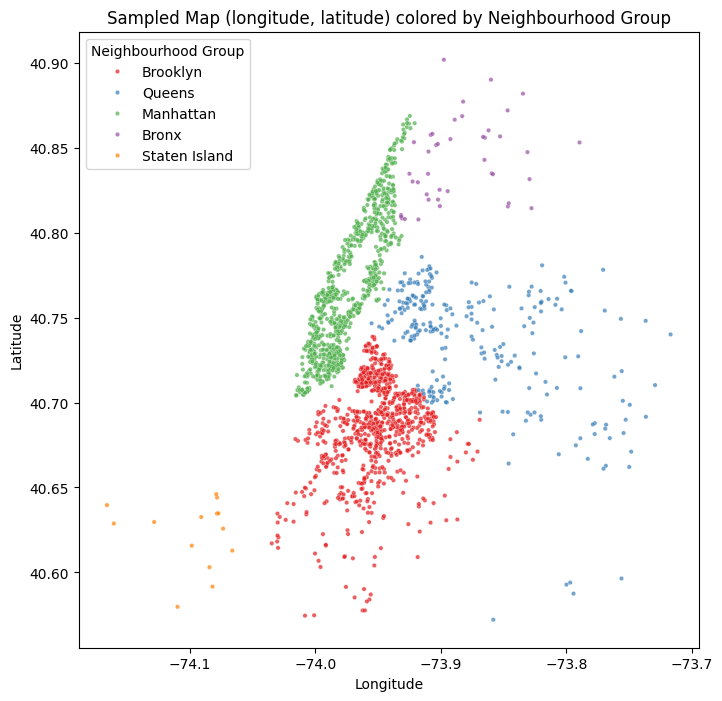

In [ ]:
import seaborn as sns

if 'latitude' in df.columns and 'longitude' in df.columns and 'neighbourhood_group' in df.columns:
    sample = df.sample(n=min(2000, len(df)), random_state=42)
    plt.figure(figsize=(8,8))
    sns.scatterplot(
        data=sample,
        x='longitude',
        y='latitude',
        hue='neighbourhood_group',
        palette='Set1',
        s=10,
        alpha=0.7
    )
    plt.title('Sampled Map (longitude, latitude) colored by Neighbourhood Group')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Neighbourhood Group')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
candidate_features = ['accommodates','bathrooms','bedrooms','number_of_reviews','reviews_per_month','availability_365','minimum_nights']
features = [c for c in candidate_features if c in df.columns]

if features and 'price' in df.columns:
    X = df[features].fillna(0)
    y = df['price'].fillna(df['price'].median())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds) ** 0.5
    print("Used features:", features)
    print("RMSE on test set:", round(rmse,2))
else:
    print("Not enough numeric features found for modeling. Found features:", features)

Used features: ['number_of_reviews', 'reviews_per_month', 'availability_365', 'minimum_nights']
RMSE on test set: 229.55


In [ ]:
import os
sample_path = '/content/drive/MyDrive/vios_project/sample_AB_NYC_2019_200rows.csv'
os.makedirs(os.path.dirname(sample_path), exist_ok=True)
df.sample(n=min(200, len(df)), random_state=42).to_csv(sample_path, index=False)
print("Saved sample CSV to:", sample_path)

Saved sample CSV to: /content/drive/MyDrive/vios_project/sample_AB_NYC_2019_200rows.csv


In [ ]:
print(df.columns.tolist())



['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


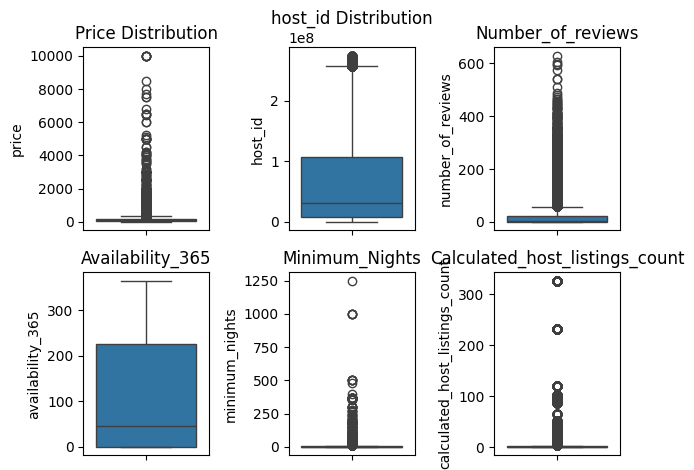

In [ ]:
from pylab import *

subplot(2, 3, 1)
sns.boxplot(y=df['price'])
title('Price Distribution')

subplot(2, 3, 5)
sns.boxplot(y=df['minimum_nights'])
title('Minimum_Nights')

subplot(2, 3, 2)
sns.boxplot(y=df['host_id'])
title('host_id Distribution')

subplot(2, 3, 3)
sns.boxplot(y=df['number_of_reviews'])
title('Number_of_reviews')

subplot(2, 3, 4)
sns.boxplot(y=df['availability_365'])
title('Availability_365')

subplot(2, 3, 6)
sns.boxplot(y=df['calculated_host_listings_count'])
title('Calculated_host_listings_count')

tight_layout()
show()

In [ ]:
unique_names_count = df['name'].nunique()
print("Total unique listing names:", unique_names_count)

Total unique listing names: 47905


In [ ]:
unique_names_sample = df['name'].unique()[:10]
print("Sample unique names:\n", unique_names_sample)

Sample unique names:
 ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park'
 'Large Cozy 1 BR Apartment In Midtown East' 'BlissArtsSpace!'
 "Large Furnished Room Near B'way " 'Cozy Clean Guest Room - Family Apt'
 'Cute & Cozy Lower East Side 1 bdrm']


/tmp/ipython-input-3059292189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


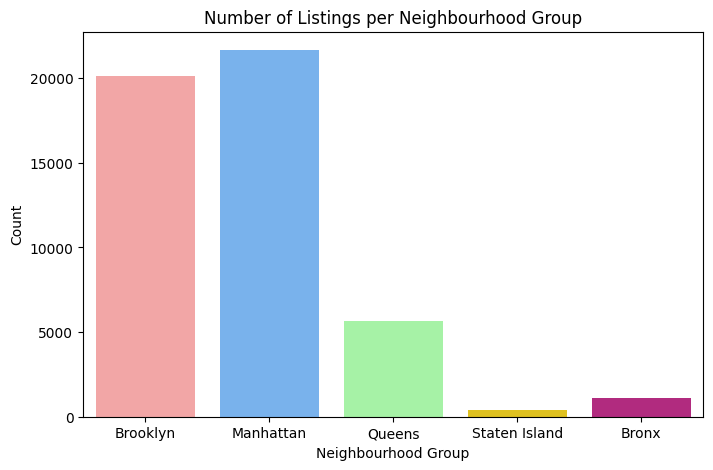

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='neighbourhood_group',
    palette=["#FF9999", "#66B2FF", "#99FF99", "#FFD700", "#C71585"]
)
plt.title("Number of Listings per Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()


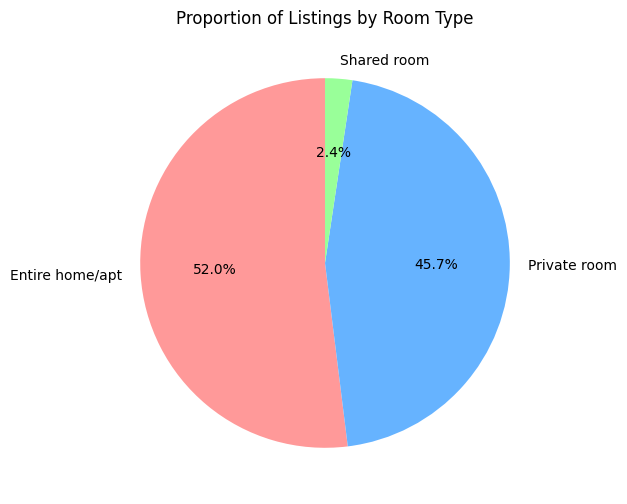

In [ ]:
room_type_counts = df['room_type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    room_type_counts,
    labels=room_type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]
)
plt.title("Proportion of Listings by Room Type")
plt.show()


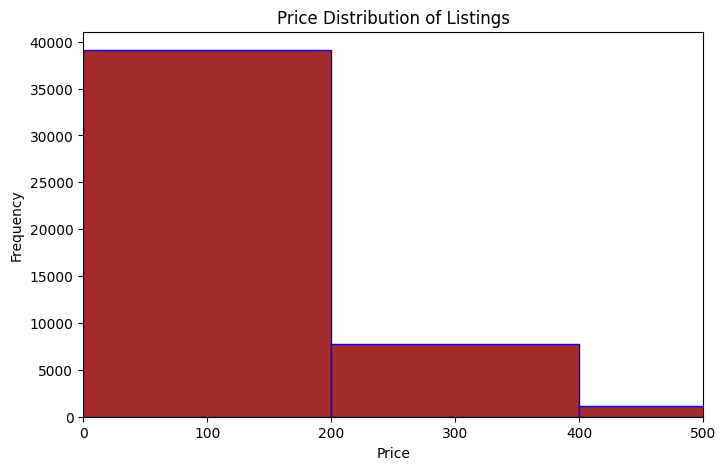

In [ ]:
#histogram
plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=50, color='brown', edgecolor='blue')
plt.xlim(0, 500)  # limit to 500 for better visualization
plt.title("Price Distribution of Listings")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

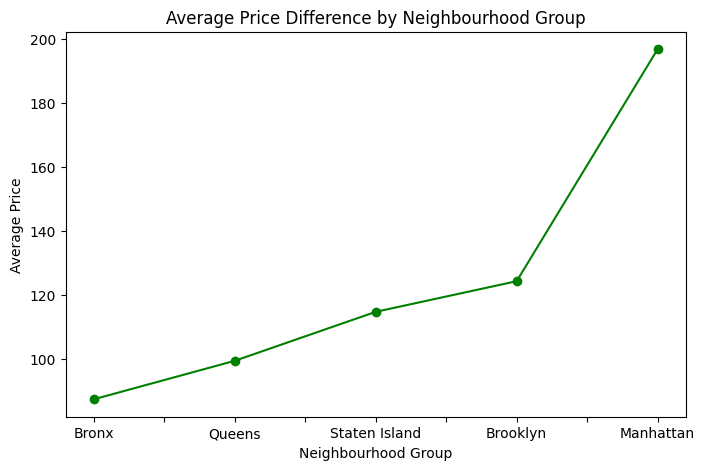

In [ ]:
avg_price = df.groupby("neighbourhood_group")['price'].mean().sort_values()

plt.figure(figsize=(8,5))
avg_price.plot(kind="line", marker="o", color="green")
plt.title("Average Price Difference by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.show()

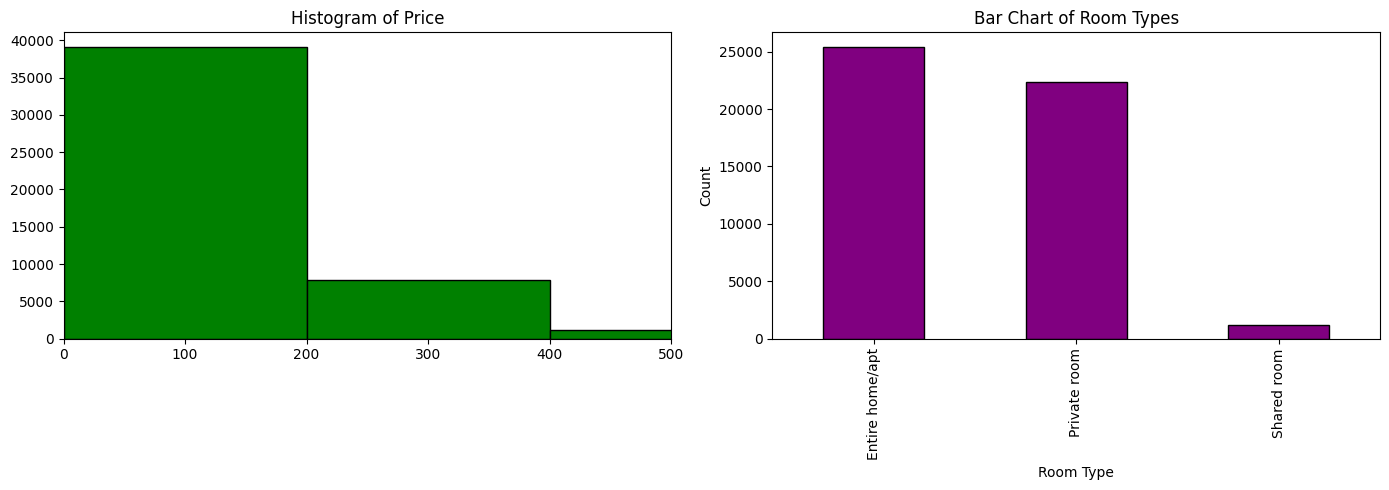

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Histogram of prices (green)
axes[0].hist(df['price'], bins=50, color='green', edgecolor='black')
axes[0].set_xlim(0, 500)
axes[0].set_title("Histogram of Price")

# Bar chart of room type counts (purple)
room_type_counts.plot(kind="bar", ax=axes[1], color="purple", edgecolor="black")
axes[1].set_title("Bar Chart of Room Types")
axes[1].set_xlabel("Room Type")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()
